# Local Descent
General approach to optimization involving
multivariate functions, or functions with more than one variable.
## Descent Direction Iteration
The iterative descent direction procedures involves the following steps:
1. Check whether $x^k$ satisfies the termination conditions. If it does, terminate; otherwise proceed to the next step.
2. Determine the _descent direction $\mathbf{d}^k$ using local information such as __gradient__ or __hessian__. Some algorithm assume $||\mathbf{d}^k||=1$, but others not.
3. Determine the _step factor_ $\alpha^k$. A step factor is sometimes referred to as _learning rate_, especially in the context of machine learning applications. 
4. Compute the next design point according to $$x_{k+1}\leftarrow x_k+\alpha_k \mathbf{d}_k$$

In [23]:
from abc import ABC, abstractmethod
import numpy as np
class DescentMethod(ABC):
    @abstractmethod
    def init(self, f, grad_f, x0):
        """Initialize the descent method"""
        pass
    
    @abstractmethod
    def step(self, f, grad_f, x):
        """Perform one optimization step"""
        pass

def iterated_descent(method: DescentMethod, f, grad_f, x0, k_max=1000):
    """
    Perform iterative descent optimization
    
    Parameters:
    - method: DescentMethod instance
    - f: objective function
    - grad_f: gradient function
    - x0: initial point
    - k_max: maximum iterations
    """
    method.init(f, grad_f, x0)
    x = x0
    history = [x.copy()]
    for _ in range(k_max):
        x_new = method.step(f, grad_f, x)
        if np.linalg.norm(x_new - x) < 1e-8:
            break
        x = x_new
        history.append(x.copy())
    return x, np.array(history)

This architecture establish a contract for descent methods and provide a generic iteration framework that works with any concrete implementation.

### Step Factors
The step factor $\alpha_k$ influences the size of the step taken in the descent direction. The _step size_ at iteration $k$ is the distance from $\mathbf{x}^k$ to $\mathbf{x}^{(k+1)}$. Some algorithms use a constant step factor. Larger stepsize can tend faster convergence but too to overshoot the minimum. Smaller steps tend to be more stable but slower convergence.

### Line Search
Instead of using a fixed or decaying step factor, we can use _line search_ to directly optimize the step factor to minimize the objective function given a descent direction $\mathbf{d}$:  $$\min_\alpha f(\mathbf{x}+\alpha \mathbf{d})$$
Is a univariate optimization problem. To inform the search we can use the derivative of the line search objective, which is simply the directional derivative along $\mathbf{d}$ at $\mathbf{x}+\alpha\mathbf{x}$.

Initial point: [1. 2. 3.]
Search direction: [ 0. -1. -1.]
Found minimum at: [ 1.         -1.12704578 -0.12704578]
Function value at minimum: -0.49076707749174786


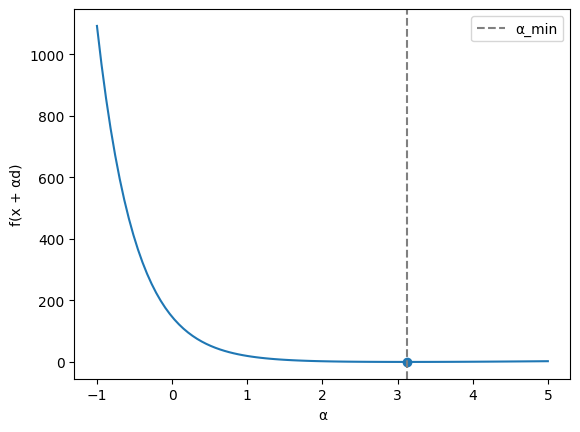

In [24]:
import numpy as np
from scipy.optimize import minimize_scalar # this function helps to the chapter 4 of AFO
import matplotlib.pyplot as plt
def bracket_minimum(f, x=0, s=1e-2, k=2.0):
    '''    
    Bracket the minimum of a function.
    Returns a tuple (a, c) that contains the minimum.
    '''
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya: # downhill
        a, b = b, a
        ya, yb = yb, ya
        s = -s

    while True: # expand the bracket
        c, yc = b + s, f(b + s)
        if yc > yb:
            return min(a,c), max(a,c)
        a, ya, b, yb = b, yb, c, yc
        s *= k

def line_search(f, x, d):
    objective = lambda alpha: f(x + alpha*d)
    a, b = bracket_minimum(objective)
    res = minimize_scalar(objective, bounds=(a,b), method='bounded')
    alpha = res.x # res is the optimizal step size, here we acces a stored value
    return x + alpha*d, alpha # also return alpha min

def f(x):
    return np.sin(x[0]*x[1]) + np.exp(x[1] + x[2]) - x[2]

x = np.array([1.0, 2.0, 3.0]) 
d = np.array([0.0, -1.0, -1.0])
min_x, a_min = line_search(f, x, d) 

print("Initial point:", x)
print("Search direction:", d)
print("Found minimum at:", min_x)
print("Function value at minimum:", f(min_x))

alphas = np.linspace(-1, 5, 100)
plt.plot(alphas, [f(x + a*d) for a in alphas])
plt.scatter(a_min, f(min_x)) 
plt.axvline(a_min, color='gray', linestyle='--', label='α_min')
plt.legend(); plt.xlabel("α"); plt.ylabel("f(x + αd)")

plt.show()

### Approximate Line Search
----
